### 1. Extraccion y preparacion

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Cargar datos
data = pd.read_csv("../datasets_limpios/credit_data_clean.csv")

# Separar variables predictoras y target
X = data.drop(columns=["target"])
y = data["target"]

# Identificar columnas categóricas
cat_cols = X.select_dtypes(include=['object']).columns

# Codificar categóricas
if len(cat_cols) > 0:
    encoder = OrdinalEncoder()
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

# Escalar variables numéricas (fundamental para redes neuronales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Datos preparados y escalados correctamente")


✅ Datos preparados y escalados correctamente


### 2. Entrenamiento del modelo de Red Neuronal (MLPClassifier)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar modelo
nn_model = MLPClassifier(
    hidden_layer_sizes=(32, 16),   # arquitectura (2 capas ocultas)
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
nn_model.fit(X_train, y_train)

print("✅ Red neuronal entrenada correctamente")


✅ Red neuronal entrenada correctamente


/home/superiorluis/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### 3. Interpretación: análisis de pesos e importancia relativa

In [3]:
import numpy as np

# Calcular importancia promedio de pesos de entrada
input_weights = np.mean(np.abs(nn_model.coefs_[0]), axis=1)
features = X.columns

importance_df = pd.DataFrame({
    "Variable": features,
    "Importancia (aprox)": input_weights
}).sort_values(by="Importancia (aprox)", ascending=False)

print("📈 Importancia aproximada de variables (por magnitud de pesos):")
display(importance_df.head(10))


📈 Importancia aproximada de variables (por magnitud de pesos):


,Variable,Importancia (aprox)
16,job,0.354028
15,existing_credits,0.345259
1,duration_months,0.342203
4,credit_amount,0.321943
12,age,0.314096
7,installment_rate,0.294541
13,other_installment_plans,0.293696
0,checking_account_status,0.288884
10,residence_since,0.288766
6,employment_since,0.288751


### 5. Evaluación completa del modelo

📊 MÉTRICAS DEL MODELO (Red Neuronal - MLPClassifier)
Accuracy:   0.690
Precision:  0.775
Recall:     0.786
F1-score:   0.780
ROC-AUC:    0.688
PR-AUC:     0.818

🧩 Matriz de confusión:
[[ 42  48]
 [ 45 165]]


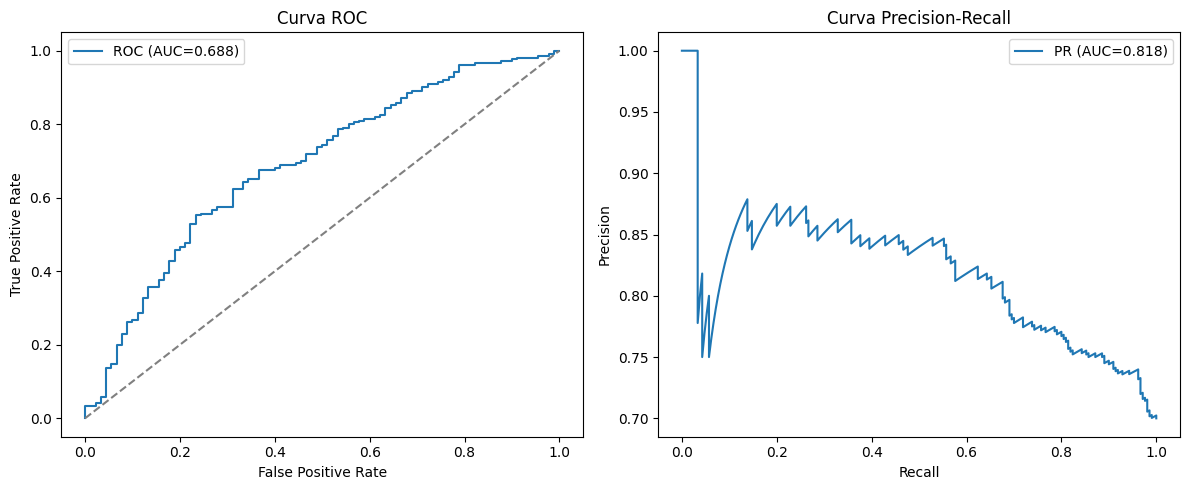

In [4]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix, precision_recall_curve
)
import matplotlib.pyplot as plt

# Predicciones
y_pred = nn_model.predict(X_test)
y_proba = nn_model.predict_proba(X_test)[:, 1]

# Métricas principales
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precisions, recalls, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recalls, precisions)

print("📊 MÉTRICAS DEL MODELO (Red Neuronal - MLPClassifier)")
print(f"Accuracy:   {acc:.3f}")
print(f"Precision:  {prec:.3f}")
print(f"Recall:     {rec:.3f}")
print(f"F1-score:   {f1:.3f}")
print(f"ROC-AUC:    {roc_auc:.3f}")
print(f"PR-AUC:     {pr_auc:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\n🧩 Matriz de confusión:")
print(cm)

# Curvas ROC y PR
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recalls, precisions, label=f"PR (AUC={pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
import joblib
import os

os.makedirs("modelos_guardados", exist_ok=True)

modelo_nombre = "neural_network.pkl"  # Cambia por: "arbol_decision.pkl", "log_reg.pkl", "red_neuronal.pkl", etc.

joblib.dump(nn_model, f"modelos_guardados/{modelo_nombre}")

print(f"✅ Modelo guardado correctamente en: modelos_guardados/{modelo_nombre}")


✅ Modelo guardado correctamente en: modelos_guardados/neural_network.pkl
